In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

path= r"C:\\Users\\559816\\Documents\\Programming\\jobs_in_data.csv"
df = pd.read_csv(path, sep = ',')

df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_in_usd'}>, <Axes: >]],
      dtype=object)

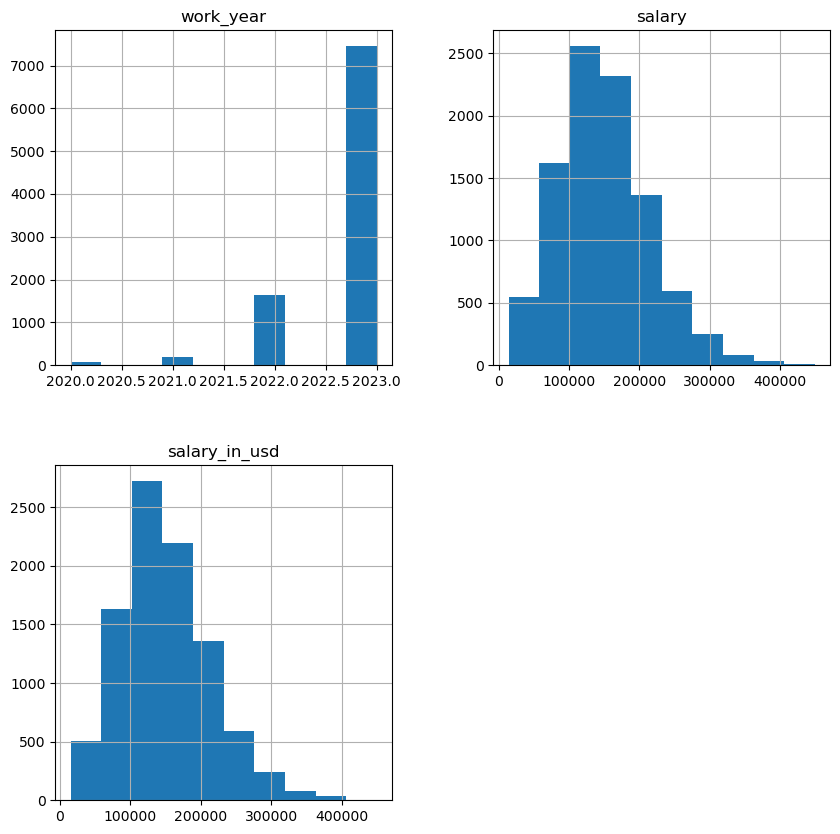

In [86]:
#visualisation des 3 colonnes numériques du tableau initial
df.hist(figsize=(10,10))

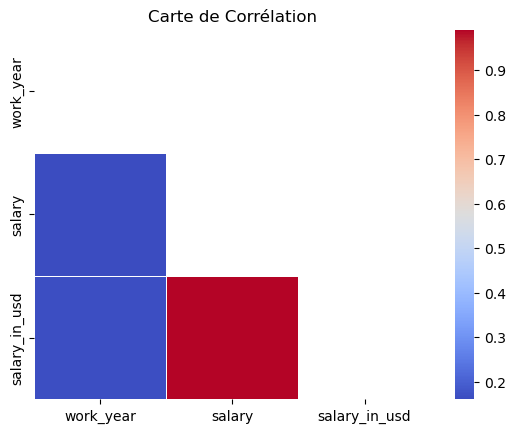

In [87]:
numeric_df = df.select_dtypes(include=[int, float])

matrix = (numeric_df.corr())
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, cmap='coolwarm', mask = mask, linewidths=0.5)
plt.title('Carte de Corrélation')
plt.show()

In [88]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [89]:
df = df.drop(columns = ["salary_currency", "salary", "employment_type", "employee_residence"], axis = 1)

df.head()

,work_year,job_title,job_category,salary_in_usd,experience_level,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Mid-level,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,212000,Senior,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,93300,Senior,In-person,United States,M


In [90]:
# columns_to_OrdinalEncoder: 'company_size', 'experience_level', 'work_year' (mettre dans l'ordre: ), 'work_setting' (mettre dans l'ordre: )

In [91]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Remote', 'Hybrid', 'In-person']])

# Mapping des tranches d'âge
df['work_setting_label'] = ordinal_encoder.fit_transform(df[['work_setting']])

# Affichage des 5 premières lignes du DataFrame
df.head()


,work_year,job_title,job_category,salary_in_usd,experience_level,work_setting,company_location,company_size,work_setting_label
0,2023,Data DevOps Engineer,Data Engineering,95012,Mid-level,Hybrid,Germany,L,1.0
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,In-person,United States,M,2.0
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,In-person,United States,M,2.0
3,2023,Data Scientist,Data Science and Research,212000,Senior,In-person,United States,M,2.0
4,2023,Data Scientist,Data Science and Research,93300,Senior,In-person,United States,M,2.0


In [92]:
ordinal_encoder = OrdinalEncoder(categories=[['Entry-level', 'Mid-level', 'Senior', 'Executive']])

# Mapping des tranches d'âge
df['experience_level_label'] = ordinal_encoder.fit_transform(df[['experience_level']])

# Affichage des 5 premières lignes du DataFrame
df.head()

,work_year,job_title,job_category,salary_in_usd,experience_level,work_setting,company_location,company_size,work_setting_label,experience_level_label
0,2023,Data DevOps Engineer,Data Engineering,95012,Mid-level,Hybrid,Germany,L,1.0,1.0
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,In-person,United States,M,2.0,2.0
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,In-person,United States,M,2.0,2.0
3,2023,Data Scientist,Data Science and Research,212000,Senior,In-person,United States,M,2.0,2.0
4,2023,Data Scientist,Data Science and Research,93300,Senior,In-person,United States,M,2.0,2.0


In [93]:
ordinal_encoder = OrdinalEncoder(categories=[[2020, 2021, 2022, 2023]])

df['work_year_label'] = ordinal_encoder.fit_transform(df[['work_year']])

df.head()

,work_year,job_title,job_category,salary_in_usd,experience_level,work_setting,company_location,company_size,work_setting_label,experience_level_label,work_year_label
0,2023,Data DevOps Engineer,Data Engineering,95012,Mid-level,Hybrid,Germany,L,1.0,1.0,3.0
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,In-person,United States,M,2.0,2.0,3.0
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,In-person,United States,M,2.0,2.0,3.0
3,2023,Data Scientist,Data Science and Research,212000,Senior,In-person,United States,M,2.0,2.0,3.0
4,2023,Data Scientist,Data Science and Research,93300,Senior,In-person,United States,M,2.0,2.0,3.0


In [94]:
ordinal_encoder = OrdinalEncoder(categories=[['S', 'M', 'L']])

df['company_size_label'] = ordinal_encoder.fit_transform(df[['company_size']])

# Affichage des 5 premières lignes du DataFrame
df.head()

,work_year,job_title,job_category,salary_in_usd,experience_level,work_setting,company_location,company_size,work_setting_label,experience_level_label,work_year_label,company_size_label
0,2023,Data DevOps Engineer,Data Engineering,95012,Mid-level,Hybrid,Germany,L,1.0,1.0,3.0,2.0
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,In-person,United States,M,2.0,2.0,3.0,1.0
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,In-person,United States,M,2.0,2.0,3.0,1.0
3,2023,Data Scientist,Data Science and Research,212000,Senior,In-person,United States,M,2.0,2.0,3.0,1.0
4,2023,Data Scientist,Data Science and Research,93300,Senior,In-person,United States,M,2.0,2.0,3.0,1.0


In [95]:
# filtrer par les Etas-unis

df = df[df['company_location'] == 'United States']

# Affichage des 5 premières lignes du DataFrame
df.head()


,work_year,job_title,job_category,salary_in_usd,experience_level,work_setting,company_location,company_size,work_setting_label,experience_level_label,work_year_label,company_size_label
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,In-person,United States,M,2.0,2.0,3.0,1.0
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,In-person,United States,M,2.0,2.0,3.0,1.0
3,2023,Data Scientist,Data Science and Research,212000,Senior,In-person,United States,M,2.0,2.0,3.0,1.0
4,2023,Data Scientist,Data Science and Research,93300,Senior,In-person,United States,M,2.0,2.0,3.0,1.0
5,2023,Data Scientist,Data Science and Research,130000,Senior,Remote,United States,M,0.0,2.0,3.0,1.0


In [96]:
# columns_to_LabelEncoder: 'job_category' 

# Importation de LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Création d'un objet LabelEncoder
label_encoder = LabelEncoder()

# Mapping de Gender de manière binaire
df['job_category_label'] = label_encoder.fit_transform(df['job_category'])

# Affichage des 5 premières lignes du DataFrame
df.head()

,work_year,job_title,job_category,salary_in_usd,experience_level,work_setting,company_location,company_size,work_setting_label,experience_level_label,work_year_label,company_size_label,job_category_label
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,In-person,United States,M,2.0,2.0,3.0,1.0,3
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,In-person,United States,M,2.0,2.0,3.0,1.0,3
3,2023,Data Scientist,Data Science and Research,212000,Senior,In-person,United States,M,2.0,2.0,3.0,1.0,7
4,2023,Data Scientist,Data Science and Research,93300,Senior,In-person,United States,M,2.0,2.0,3.0,1.0,7
5,2023,Data Scientist,Data Science and Research,130000,Senior,Remote,United States,M,0.0,2.0,3.0,1.0,7


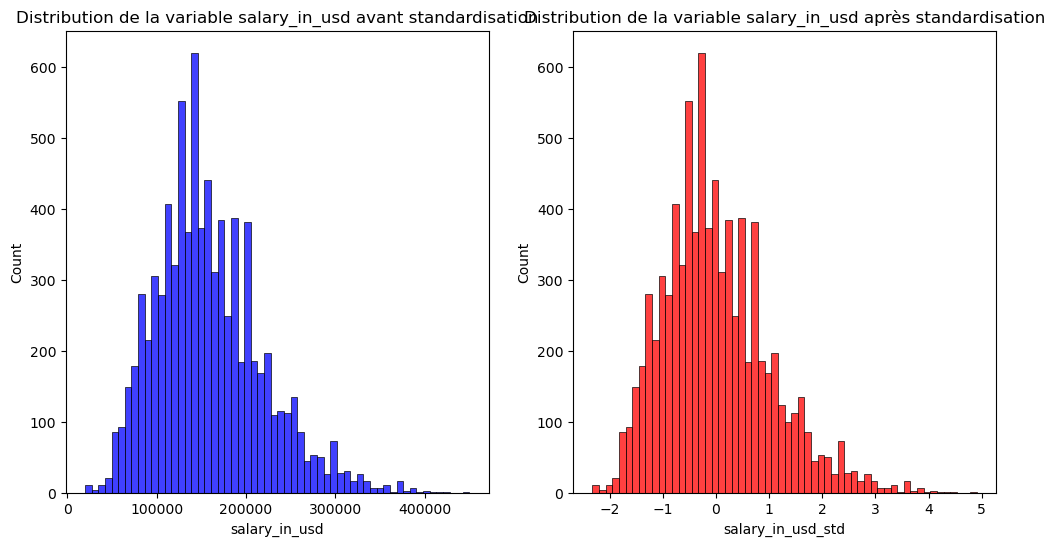

In [97]:
# StandardScaler Transformation: 'salary_in_usd'

# Importation de StandardScaler
from sklearn.preprocessing import StandardScaler

# Création d'un objet StandardScaler
scaler = StandardScaler()

# Standardisation des données comme Income par exemple ici 
df['salary_in_usd_std'] = scaler.fit_transform(df[['salary_in_usd']])

# Création d'une figure
plt.figure(figsize=(12, 6))

# Distribution de la variable Income avant standardisation
plt.subplot(1, 2, 1)

sns.histplot(df['salary_in_usd'], color='b', fill=True, label='salary_in_usd')
plt.title('Distribution de la variable salary_in_usd avant standardisation')

# Distribution de la variable Income après standardisation
plt.subplot(1, 2, 2)

sns.histplot(df['salary_in_usd_std'], color='r', fill=True, label='salary_in_usd')
plt.title('Distribution de la variable salary_in_usd après standardisation')

# Affichage de la figure
plt.show()

Text(0.5, 1.0, 'Distribution de la variable salary in usd après transformation log')

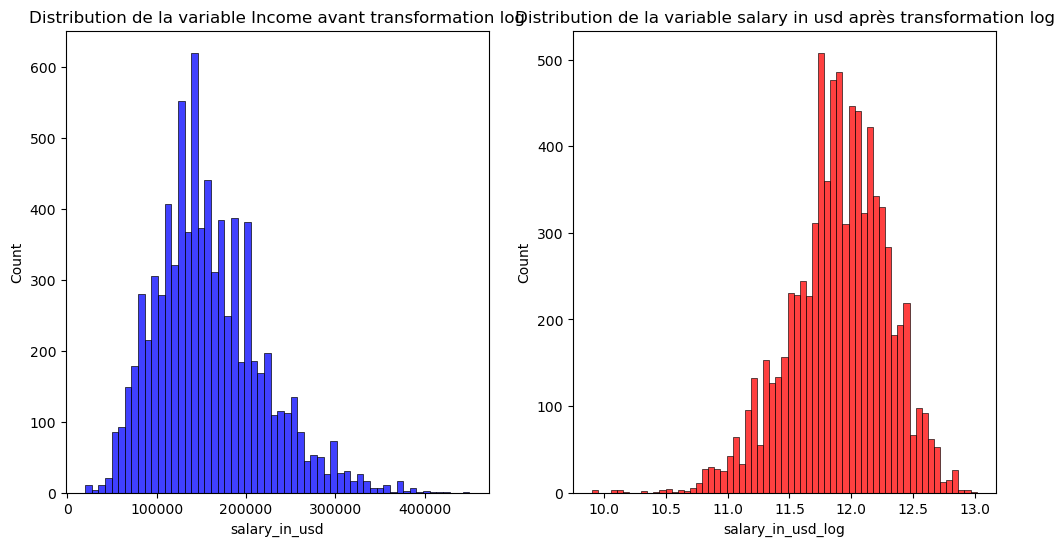

In [98]:
# Log Transformation: 'salary_in_usd'

# Création d'une variable log-transformée de salary_in_usd
df['salary_in_usd_log'] = np.log1p(df['salary_in_usd'])

# Création d'une figure
plt.figure(figsize=(12, 6))

# Distribution de la variable Income avant transformation log
plt.subplot(1, 2, 1)
sns.histplot(df['salary_in_usd'], color='b', fill=True, label='salary_in_usd')
plt.title('Distribution de la variable Income avant transformation log')

# Distribution de la variable Income après transformation log
plt.subplot(1, 2, 2)
sns.histplot(df['salary_in_usd_log'], color='r', fill=True, label='Isalary_in_usd_log')
plt.title('Distribution de la variable salary in usd après transformation log')

In [99]:
df.head()

,work_year,job_title,job_category,salary_in_usd,experience_level,work_setting,company_location,company_size,work_setting_label,experience_level_label,work_year_label,company_size_label,job_category_label,salary_in_usd_std,salary_in_usd_log
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,In-person,United States,M,2.0,2.0,3.0,1.0,3,0.468036,12.133507
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,In-person,United States,M,2.0,2.0,3.0,1.0,3,-1.283656,11.312045
3,2023,Data Scientist,Data Science and Research,212000,Senior,In-person,United States,M,2.0,2.0,3.0,1.0,7,0.905118,12.264346
4,2023,Data Scientist,Data Science and Research,93300,Senior,In-person,United States,M,2.0,2.0,3.0,1.0,7,-1.090331,11.443586
5,2023,Data Scientist,Data Science and Research,130000,Senior,Remote,United States,M,0.0,2.0,3.0,1.0,7,-0.473372,11.775297


In [100]:
Q1 = df['salary_in_usd_std'].quantile(0.25)
Q3 = df['salary_in_usd_std'].quantile(0.75)
IQR = Q3 - Q1

# Définir les valeurs aberrantes comme toute valeur entre 1.1 * IQR du premier au troisième quartile:
lower_bound = Q1 - 1.1 * IQR
upper_bound = Q3 + 1.1 * IQR

# Identifier outliers:
outliers = df[(df['salary_in_usd_std'] < lower_bound) | (df['salary_in_usd_std'] > upper_bound)]
print("Number of outliers detected:", len(outliers))

Number of outliers detected: 352


In [101]:
df = df[(df['salary_in_usd_std'] >= lower_bound) & (df['salary_in_usd_std'] <= upper_bound)]
print("Data size after trimming:", df.shape)

Data size after trimming: (7780, 15)


array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'work_setting_label'}>],
       [<Axes: title={'center': 'experience_level_label'}>,
        <Axes: title={'center': 'work_year_label'}>,
        <Axes: title={'center': 'company_size_label'}>],
       [<Axes: title={'center': 'job_category_label'}>,
        <Axes: title={'center': 'salary_in_usd_std'}>,
        <Axes: title={'center': 'salary_in_usd_log'}>]], dtype=object)

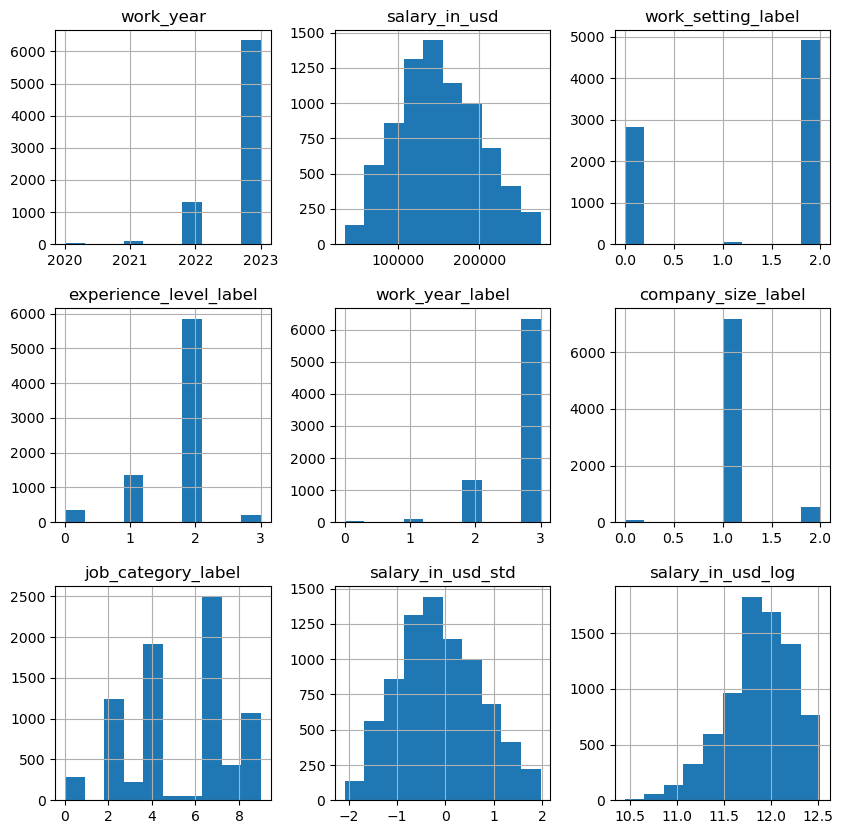

In [102]:
df.hist(figsize=(10,10))

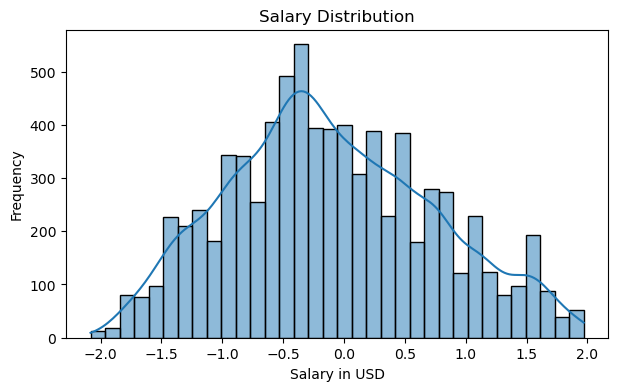

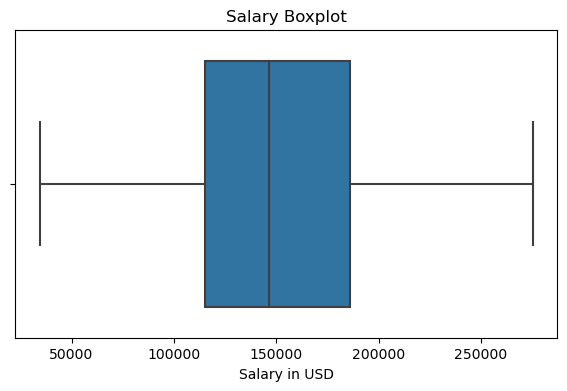

In [103]:
# Histogram
plt.figure(figsize=(7, 4))
sns.histplot(data=df, x='salary_in_usd_std', kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Salary Boxplot')
plt.xlabel('Salary in USD')
plt.show()

In [104]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_in_usd',
       'experience_level', 'work_setting', 'company_location', 'company_size',
       'work_setting_label', 'experience_level_label', 'work_year_label',
       'company_size_label', 'job_category_label', 'salary_in_usd_std',
       'salary_in_usd_log'],
      dtype='object')

In [105]:
df = df.dropna()

In [106]:
df.head()

,work_year,job_title,job_category,salary_in_usd,experience_level,work_setting,company_location,company_size,work_setting_label,experience_level_label,work_year_label,company_size_label,job_category_label,salary_in_usd_std,salary_in_usd_log
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,In-person,United States,M,2.0,2.0,3.0,1.0,3,0.468036,12.133507
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,In-person,United States,M,2.0,2.0,3.0,1.0,3,-1.283656,11.312045
3,2023,Data Scientist,Data Science and Research,212000,Senior,In-person,United States,M,2.0,2.0,3.0,1.0,7,0.905118,12.264346
4,2023,Data Scientist,Data Science and Research,93300,Senior,In-person,United States,M,2.0,2.0,3.0,1.0,7,-1.090331,11.443586
5,2023,Data Scientist,Data Science and Research,130000,Senior,Remote,United States,M,0.0,2.0,3.0,1.0,7,-0.473372,11.775297


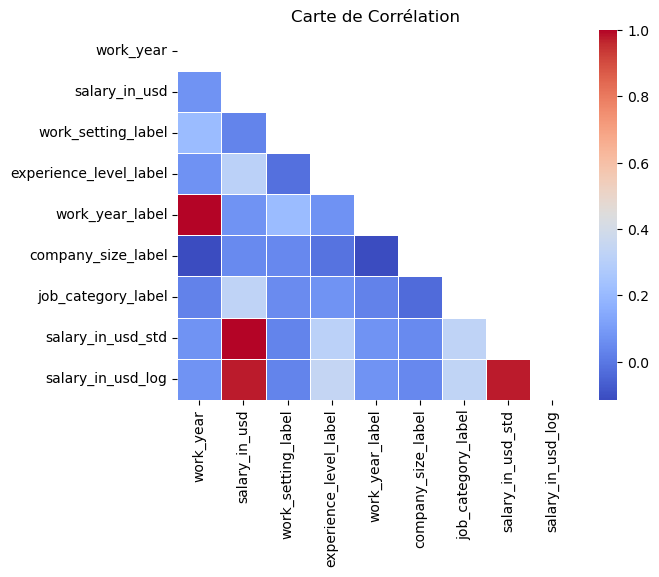

In [107]:
numeric_df = df.select_dtypes(include=[int, float])

matrix = (numeric_df.corr())
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, cmap='coolwarm', mask = mask, linewidths=0.5)
plt.title('Carte de Corrélation')
plt.show()

In [108]:
df.to_csv('tableau_numerique.csv', index=False)

In [109]:
X = df[['work_setting_label', 'experience_level_label', 'work_year_label',
       'company_size_label', 'job_category_label', 'job_title']]

y = df['salary_in_usd_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
#TargetEncoder: 'job_title' (faire après le split) -> moyenne de salaires grouped by

import pandas as pd
from category_encoders import TargetEncoder

In [111]:
encoder = TargetEncoder(cols= ['job_title'])

encoder.fit(X_train['job_title'], y_train)

TargetEncoder(cols=['job_title'])

In [112]:
X_train['job_title_encoded']=encoder.transform(X_train['job_title'], y_train)

In [113]:
X_train.drop('job_title', axis=1, inplace=True)

In [114]:
X_test['job_title_encoded']=encoder.transform(X_test['job_title'])

In [115]:
X_test.drop('job_title', axis=1, inplace=True)

In [116]:
from sklearn.metrics import r2_score
import xgboost as xgb

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


#XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                 max_depth = 5, alpha = 10, n_estimators = 100)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [117]:
print(r2_score(y_test, y_pred_lr))
print(r2_score(y_test, y_pred_rf))
print(r2_score(y_test, y_pred_xgb))


0.24872956905588728
0.24258504615799548
0.2619049042592634


In [118]:
# Calculate RMSE for each model
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
rmse_rf = mean_squared_error(np.exp(y_test), np.exp (y_pred_rf), squared=False)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"XGBoost RMSE: {rmse_xgb}")

Linear Regression RMSE: 0.3025656672816803
Random Forest RMSE: 45353.6952199037
XGBoost RMSE: 0.29990082338626295
